#**Project Name: Fake News Detection and Evaluation with Confusion Matrix**
####**created by: Suprava Das**

# **Problem Statement:**


This project addresses the challenge of distinguishing fake news from true news using machine learning techniques. A classification model is trained on textual data, and its effectiveness is evaluated through a confusion matrix to assess accuracy and misclassification patterns.

# **Data Introduction:**

This dataset was compiled from real-world sources; the genuine articles were scraped from Reuters.com (a reputable news website). In contrast, the fake news articles were gathered from various unreliable platforms identified by Politifact (a U.S.-based fact-checking organization) and Wikipedia. The collection covers articles on diverse subjects, though most of them center around politics and world news.

The dataset cab also be downloaded from kaggle using the link: www.kaggle.com/datasets/emineyetm/fake-news-detection-datasets

# **Import Packages**

Imported all required libraries and installed any missing packages in Google Colab.

In [ ]:
# installed missing package gensim
!pip install gensim

In [ ]:
# import necessary packages
import  matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import re
import string
from sklearn.model_selection import train_test_split
from gensim.test.utils import common_texts
from gensim.models import Word2Vec
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# mounted the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#**Data Preprocessing**

In [ ]:
# read the csv file using pandas dataframe
fake_news_data = pd.read_csv('/content/drive/MyDrive/Classroom/Autumn Internship 2025 Section 1/fake.csv')
true_news_data = pd.read_csv('/content/drive/MyDrive/Classroom/Autumn Internship 2025 Section 1/true.csv')

**Q1.** View the imported csv file data using Pandas Dataframe.

In [ ]:
fake_news_data    #For viewing the entire fake_news_data DataFrame
fake_news_data.head()     #For viewing the first 5 rows of fake_news_data DataFrame
fake_news_data.tail()     #For viewing the last 5 rows of fake_news_data DataFrame

true_news_data    #For viewing the entire true_news_data DataFrame
true_news_data.head()     #For viewing the first 5 rows of fake_news_data DataFrame
true_news_data.tail()     #For viewing the last 5 rows of fake_news_data DataFrame

,title,text,subject,date
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017"


In [ ]:
fake_news_data["class"] = 1  # Fake News data → 1
true_news_data["class"] = 0  # True News data → 0

In [ ]:
# merged true and fake news datasets
merged_data = [fake_news_data,true_news_data]
df = pd.concat(merged_data,axis=0)

**Q2.** drop rows from the dataset consisting null values.

In [ ]:
df = df.dropna(axis=0)    #This drops the rows which have null values

**Q3.** shuffle the data.

In [ ]:
df = df.sample(frac=1)    #This will shuffle the data (frac means 100% data)

In [ ]:
#reset index of the merged dataframe
df = df.reset_index(drop=True)

In [ ]:
# view top 10 rows of processed dataset
df.head(10)

,title,text,subject,date,class
0,Russian prosecutors seek 10 years in jail for ...,MOSCOW (Reuters) - Russian prosecutors on Mond...,worldnews,"December 4, 2017",0
1,WATCH: Reporter Calls Kellyanne Conway And He...,Everyone knows by now just how fast and loose ...,News,"April 12, 2017",1
2,CROOKED HILLARY VS FBI’S COMEY [Video],This Supercut of Hillary vs Comey gets to the ...,politics,"Jul 6, 2016",1
3,Peace Prize President Obama Approved $200 Bill...,21st Century Wire says The military industrial...,Middle-east,"May 24, 2016",1
4,President Trump’s Moving Pentagon Speech and C...,President Trump and First Lady Melania commemo...,Government News,"Sep 11, 2017",1
5,Trump Kicks Off Poland Visit By Trashing Amer...,Donald Trump s first trip overseas was an abso...,News,"July 6, 2017",1
6,BREAKING VIDEO: BRICKS AND ROCKS HURLED AT POL...,High school kids out of control? Noooo! We ve ...,Government News,"Apr 27, 2015",1
7,Anti-Gun Hypocrites Bash David Beckham’s Son f...,David Beckham s son posed with a gun in a mode...,left-news,"Sep 4, 2017",1
8,Trump says prepared to take on North Korea wit...,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,"April 12, 2017",0
9,Irish foreign minister says opposition vote wo...,DUBLIN (Reuters) - Ireland s government will c...,worldnews,"November 24, 2017",0


**Q4.** view the text content of a random data point.

In [ ]:
random_row = df.sample(n=1)    #This will give a random row from the DataFrame
print(random_row['text'].values[0])  #This gives the content in that randon row's "text" column

Tune in to the Alternate Current Radio Network (ACR) for another LIVE broadcast of  The Boiler Room  starting at 6 PM PST | 9 PM EST for this special broadcast. Join us for uncensored, uninterruptible talk radio, custom-made for barfly philosophers, misguided moralists, masochists, street corner evangelists, media-maniacs, savants, political animals and otherwise lovable rascals.Join ACR hosts Hesher, & Spore along with Andy Nowicki of Alt Right Blogspot, Jay Dyer from jaysanalysis.com and ACR s big wave surfer, Stewart Howe. Tonight the Boiler Gang is talking about the Liberal Left feeling BURNT by the way Bernie flopped over to endorse Hillary after having his nomination stolen by hook and crook as revealed by the wikileaks hacks. We unfortunately, once again, as though forced by a week of news happenings, dive deep into project Mockingbird/Gladio style stage managed terror events. We discuss a growing swath of bought and paid for FAKE news, the repealing of the Smith Mundt Act effec

**Data Visualization**

Text(0, 0.5, 'Number of News')

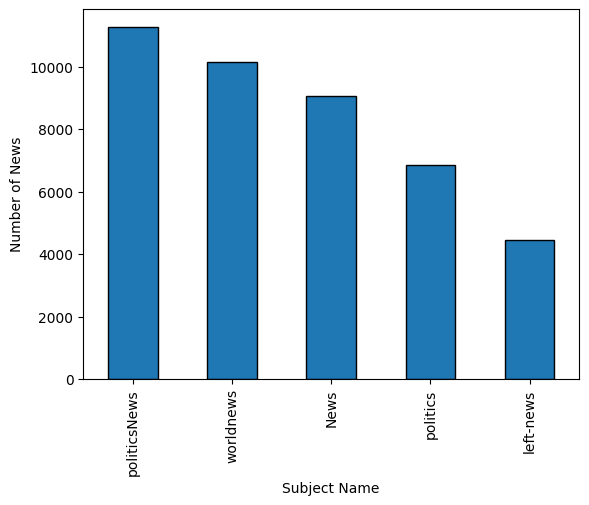

In [ ]:
#create a data visualzation of bar/column/line chart of top 5 subjects ->
top_5_subjects = (df['subject'].value_counts()).nlargest(5)
top_5_subjects.plot(kind='bar', edgecolor='black', stacked=True)
plt.xlabel('Subject Name')
plt.ylabel('Number of News')

**Q5.** Create a pie chart to find the pecentage of news on differenet subject.

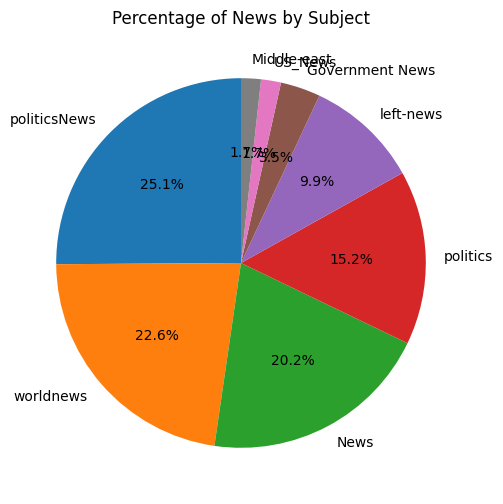

In [ ]:
subject_counts = df['subject'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(subject_counts, labels=subject_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Percentage of News by Subject")
plt.show()

**Text Processing**

In [ ]:
# function to remove space,special charecter and convert all text into lower case
def wordopt(text):
  text = text.lower()
  text= re.sub(r'https://\S+|www\.\S+','',text) # remove https:// or www.com
  text = re.sub(r'[^\w]',' ', text) #remove special charecter
  text= re.sub(r'\s+',' ',text) #remove multiple space

  return text

In [ ]:
# drop unnecessary columns for classification purpose
df1= df.drop(['title','subject','date'],axis=1)

In [ ]:
# apply wordopt method to the whole dataset and view the text content of a random data point
df1['text']=df1['text'].apply(wordopt)
df1['text'][100]

'the applications for white house interns just took a sharp nose dive former president bill clinton could practically serve an unconstitutional third term as president if hillary clinton becomes sick in office if elected given the previous first ladies who acted as presidents on behalf of their sick husbands former first ladies nancy reagan mamie eisenhower and lady edith galt wilson all made presidential decisions while their husbands were ill in office galt wilson in particular acted as the de facto president when president woodrow wilson suffered a stroke in 1919 to prevent vice president thomas marshall from assuming the presidency because marshall was too friendly to wilson s political rival in congress if a president hillary clinton s health were to decline it is a certainty that former president bill clinton would emulate galt and act in his wife s stead as president said investigative journalist wayne madsen senator tim kaine was chosen as mrs clinton s running mate because he 

# **Building Model**

In [ ]:
# Separate independent and target columns from the dataset and stored them in x & y variables
x= df1['text']
y= df1['class']

**Q6.** Split the dataset into training and testing sets with 25% test size and store them in x_train, x_test, y_train, and y_test.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)   #This splits the dataframe into the 4 categories

## **Word Embedding ( Word2Vec )**

In [ ]:
# import bbc_news data using url link in json format for training Word2Vec word embedding model
news = pd.read_json('https://query.data.world/s/7c6p2lxb3wjibfsfbp4mwy7p7y4y2d?dws=00000')
news_seg = news['content']
print("Size of Word Dictonary for training Word2Vec: ",news_seg.shape[0])
news_seg.head(2)

Size of Word Dictonary for training Word2Vec:  15825


,content
0,The heroin substitute methadone can be used as...
1,The eldest son of North Korean leader Kim Jong...


In [ ]:
# apply wordopt function for text processing
news_seg=news_seg.apply(wordopt)
sentences = [sentence.split() for sentence in news_seg ]
w2v_model = Word2Vec(sentences,  window=5, min_count=5, workers=4)

In [ ]:
# function to convert a sentence into vector form
def vectorize(sentence):
    words = sentence.split()
    words_vecs = [w2v_model.wv[word] for word in words if word in w2v_model.wv]
    if len(words_vecs) == 0:
        return np.zeros(100)
    words_vecs = np.array(words_vecs)
    return words_vecs.mean(axis=0)

In [ ]:
# convert train and test dataset into vector form
xv_train = np.array([vectorize(sentence) for sentence in x_train])
xv_test = np.array([vectorize(sentence) for sentence in x_test])

##**Logistic Regression**

In [ ]:
# Trains a Logistic Regression model using vector formed trained data ->
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(xv_train,y_train)

LogisticRegression()

In [ ]:
# detect the class(fake or true) on test data and evaluates its accuracy on test set
y_pred = logistic_model.predict(xv_test)
print("Prediction on test data: ",y_pred)
print("Accuracy Score on Test Data: ",logistic_model.score(xv_test,y_test))

Prediction on test data:  [1 0 1 ... 1 0 1]
Accuracy Score on Test Data:  0.9398663697104677


####**Accuracy Checking**

In [ ]:
# Check Precision, Recall, F1 Score of the logistic model ->
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred))

Accuracy: 0.9398663697104677
Precision: 0.9444349461446401
Recall: 0.9404153898535921
F1 score: 0.942420882026785


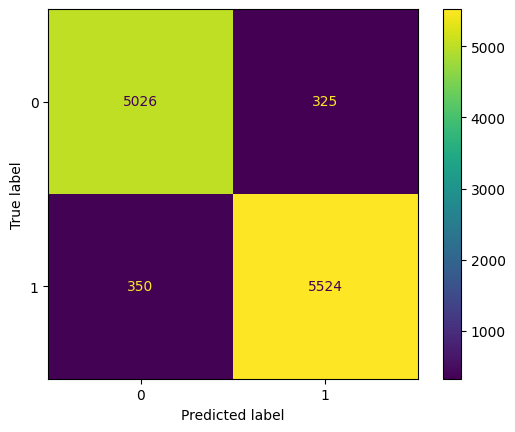

In [ ]:
# Check overall accuracy using confusion matrix
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm= confusion_matrix(y_test,y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm)
cm_display.plot()
plt.show()

##**Random Forest Classifier**

####**Model Building and Prediction**

**Q7.** Use Random Forest Classifer for this classfication purpose and predict the outcomes for test data.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100,random_state=42)
rf_model.fit(xv_train, y_train)
y_pred = rf_model.predict(xv_test)
print("Prediction on test data: ",y_pred)
print("Accuracy Score on Test Data: ",rf_model.score(xv_test,y_test))

Prediction on test data:  [1 0 1 ... 1 0 1]
Accuracy Score on Test Data:  0.9374610244988865


####**Accuracy Checking**

**Q8.** Find the accuracy, precison, recall, F1 Score of the model while using Random Forest Classsifier and visualize overall accuracy using confusion matrix.

In [ ]:
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred))

Accuracy: 0.9374610244988865
Precision: 0.9387512724804886
Recall: 0.9419475655430711
F1 score: 0.9403467029231815


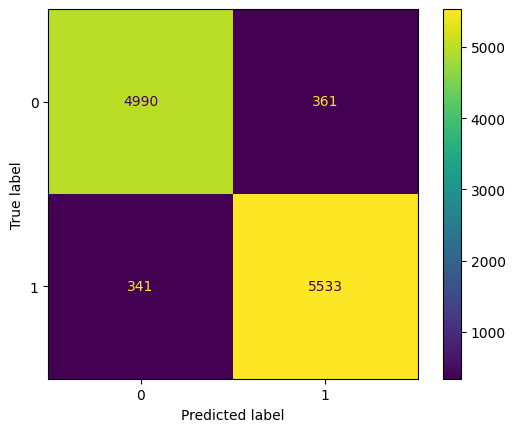

In [ ]:
cm= confusion_matrix(y_test,y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm)
cm_display.plot()
plt.show()

#**Save the Model using pickle**

In [ ]:
# save the logistic regression model as pickle file
import pickle
filename1 = '/content/drive/My Drive/Classroom/Autumn Internship 2025 Section 1/word2vec_logistic_model.pickle'
pickle.dump(logistic_model, open(filename1, 'wb')) #word2vec model

In [ ]:
# Load the pickle file and checkout model score
loaded_model = pickle.load(open(filename1, 'rb'))
result = loaded_model.score(xv_test, y_test)
print(result)

0.9429844097995546


**Q9.** Save the trained Random Forest Model as pickle/svg file in your desired repository for further use.

In [ ]:
filename2 = '/content/drive/My Drive/Classroom/Autumn Internship 2025 Section 1/word2vec_random_forest_model.pickle'
pickle.dump(rf_model, open(filename2, 'wb'))

**Q10.** Load that saved model in another Notebook use it on other dataset for fake news detection.

######The detailed solution for this is there in the other attached notebook. (https://colab.research.google.com/drive/1MM_rrUw3WvKbsdDqJ-oOl3nBRZb2tNfX?usp=drive_link)

**Q11(Optional).**


1.  Try to enhance the model's accuracy by using adaboost or any other boosting methods.
2.  Use TF-IDF or any other vectorizer instead of Word2Vec and study how much it affects on model's accuracy.






In [ ]:
#Let us first do the first one
from sklearn.ensemble import AdaBoostClassifier    #Importing the AdaBoostClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
ada_rf = AdaBoostClassifier(
    estimator=rf,
    n_estimators=50,       # Number of boosting rounds
    learning_rate=1.0,
    random_state=42
)
ada_rf.fit(xv_train, y_train)
y_pred = ada_rf.predict(xv_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9376391982182628


######The Accuracy Score of both Random Forest and Random Forest with AdaBoost is same because AdaBoost works well with weak classifiers (like Decision Stumps). Here, Random Forest is already too strong enough to classify the whole dataset.

In [ ]:
#Let us now do the second one
from sklearn.feature_extraction.text import TfidfVectorizer
X_text = df1['text']
y = df1['class']
tfidf = TfidfVectorizer(
    max_features=5000,    # take top 5000 words
    stop_words='english', # remove common stopwords
    ngram_range=(1,2)     # unigrams + bigrams
)
X = tfidf.fit_transform(X_text)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.996792873051225


######We could see that the accuracy is now very close to 100, which is remarkable but there could be a chance that overfitting has taken place. In Word2vec, what happened was that a lot of semantic meaning got lost while averaging the words for sentence semantics, but this was not the case with TF-IDF as it doesn't work on semantics rather works on the frequency of occurance of particular words in the dataset.